In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)

[np.str_('malignant'), np.str_('benign')]

In [6]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()
kolonlar=list(df.columns)
print(kolonlar)  #target olmadığı için ben ekliyorum./Because there’s no target defined, I’m adding one.
df["Target"]=data.target
df.head()

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [8]:
knn=KNeighborsClassifier(n_neighbors=8) #modeli oluşturduk  ##neigbors 5 iken accuracy_score =0.95
                                                             ##neigbors 10 iken accuracy_score =0.98
                                                             ## komşu sayısı arttıkça scor artıyor
'''We observed that increasing the number of neighbors in the KNN model leads to higher accuracy. Specifically, the accuracy score rose from 0.95 (with 5 neighbors) to 0.98 (with 10 neighbors).
'''


'We observed that increasing the number of neighbors in the KNN model leads to higher accuracy. Specifically, the accuracy score rose from 0.95 (with 5 neighbors) to 0.98 (with 10 neighbors).\n'

In [9]:
X=data.data
y=data.target

Şimdi train test split yaparak modelin eğtimine hazırlıyoruz //Now we’re preparing the model for training by performing a train-test split.

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

Bir de preprocessing işlemi kullanarak yapalım StandardScaler ile //Let’s also apply preprocessing using StandardScaler.

---



In [12]:
'''
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
scale işlemi ile scale yaptım accuracy_score 0.98 den 0.63 e düştü bu yüzden
//After applying scaling, the accuracy score dropped from 0.98 to 0.63, so I decided not to use it.
'''

'\nscaler=StandardScaler()\nX_train=scaler.fit_transform(X_train)\nX_test=scaler.transform(X_test)\nscale işlemi ile scale yaptım accuracy_score 0.98 den 0.63 e düştü bu yüzden \n//After applying scaling, the accuracy score dropped from 0.98 to 0.63, so I decided not to use it.\n'

In [13]:
y_pred=knn.predict(X_test) #şimdi de y train ile tahmin yaptıracağım //Now I’m going to make predictions using y_train.
score=accuracy_score(y_test,y_pred)
print(score)

conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

0.9649122807017544
[[ 59   4]
 [  2 106]]


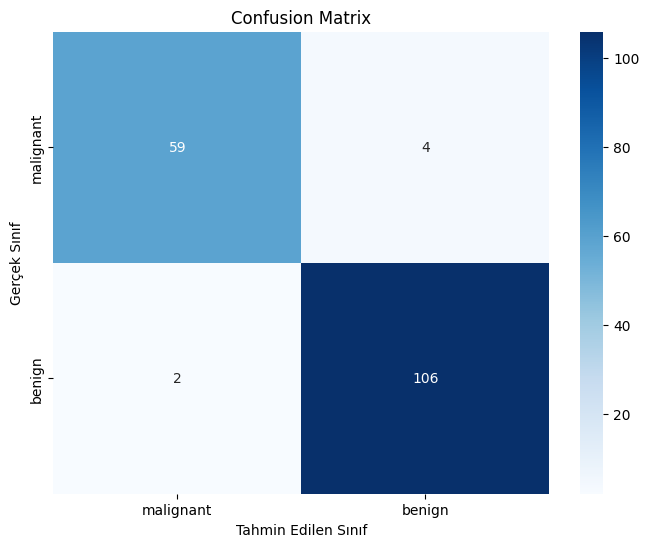

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()

KNN için hipeparametre değeri k yani komşu değerleri ile doğruluğu optimize etmek.//n KNN, the hyperparameter ‘k’—which represents the number of neighbors—is used to optimize accuracy.

0.935672514619883
0.9298245614035088
0.9415204678362573
0.9473684210526315
0.9590643274853801
0.9590643274853801
0.9649122807017544
0.9649122807017544
0.9707602339181286
0.9824561403508771
0.9766081871345029
0.9766081871345029
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9649122807017544
0.9590643274853801
0.9649122807017544


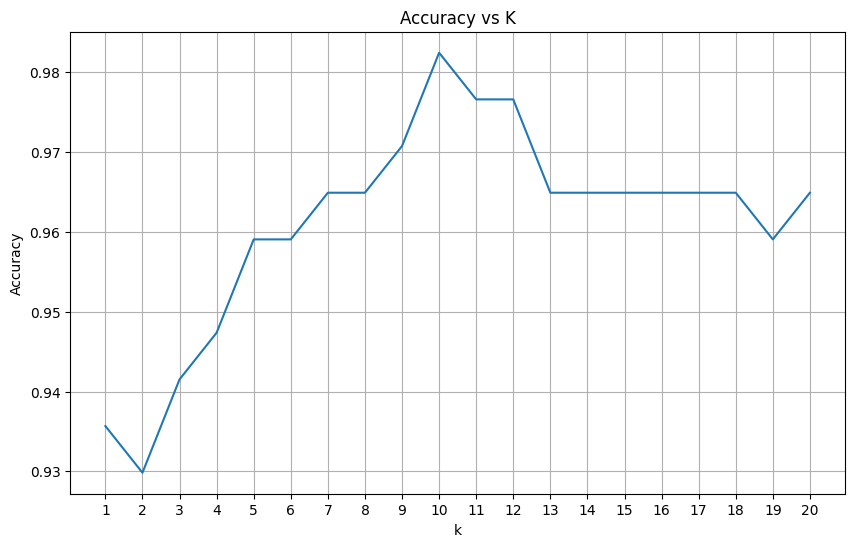

In [15]:
acc_list=[]
k_list=range(1,21)
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test) #şimdi de y train ile tahmin yaptıracam
  score=accuracy_score(y_test,y_pred)
  acc_list.append(score)
  print(score)
plt.figure(figsize=(10,6))
plt.plot(k_list,acc_list)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.title("Accuracy vs K")
plt.xticks(k_list)
plt.show()